In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
economic_data = pd.read_csv('lumaria_economic_sample.csv')
interventions = pd.read_csv('lumaria_intervention_sample.csv')
mortality_rates = pd.read_csv('lumaria_mortality_sample.csv')
#inforce_data = pd.read_csv('superlife_inforce_sample_2024.csv')
inforce_data = pd.read_csv('2024-srcsc-superlife-inforce-dataset.csv')

/var/folders/lk/qfq5b_gn49q48_y_dw04qcd80000gn/T/ipykernel_10150/3165710601.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  inforce_data = pd.read_csv('2024-srcsc-superlife-inforce-dataset.csv')


In [6]:
current_year = 2024
years = range(2004, 2024)

In [7]:
# Generate a DataFrame for years
years_df = pd.DataFrame({'Year': np.arange(2004, 2024)})

# Cross join to create all combinations of policyholders and years
inforce_years = pd.merge(inforce_data.assign(key=1), years_df.assign(key=1), on='key').drop('key', axis=1)

# Calculate age for each policyholder-year combination
inforce_years['Age'] = inforce_years['Year'] - inforce_years['Issue.year'] + inforce_years['Issue.age']

# Filter out years before issue or after lapse
inforce_years = inforce_years.loc[(inforce_years['Year'] >= inforce_years['Issue.year']) & 
                                  (inforce_years['Year'] <= inforce_years['Year.of.Lapse'].fillna(9999))]

# Merge with mortality rates table to get the mortality rate for each age
inforce_years = pd.merge(inforce_years, mortality_rates, on='Age', how='left')

# Pivot to get the wide format table with policy numbers as rows and years as columns
mortality_table = inforce_years.pivot(index='Policy.number', columns='Year', values='Mortality Rate').fillna(0)

# After pivoting, to get 'Policy.number' as the first column
mortality_table = mortality_table.reset_index()

# To remove the name 'Year' from the columns if it appears after resetting the index
mortality_table.columns.name = None


In [8]:
# Pre-intervention mortality rates from 2004 to 2023
mortality_table

,Policy.number,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,00017VG4XXHV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002881,0.003145,0.003449,0.003795,0.004178,0.004613
1,0002UJPUUTWR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000817,0.000873,0.000950,0.001039,0.001130
2,0003VKGC95EY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001857,0.002014,...,0.002411,0.002635,0.002881,0.003145,0.003449,0.003795,0.004178,0.004613,0.005106,0.005620
3,000ARXMW0LM0,0.001573,0.001709,0.001857,0.002014,0.002199,0.002411,0.002635,0.002881,0.003145,...,0.003795,0.004178,0.004613,0.005106,0.005620,0.006170,0.006776,0.007501,0.000000,0.000000
4,000AWCZ28YPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002199,0.002411,0.002635,0.002881,0.003145,0.003449,0.003795,0.004178,0.004613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977686,ZZZTCFJPOM0L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001337,0.001447,0.001573,0.001709,0.001857,0.002014,0.002199,0.002411,0.002635,0.002881
977687,ZZZV9CNHCJWI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001857,...,0.002199,0.002411,0.002635,0.002881,0.003145,0.003449,0.003795,0.004178,0.004613,0.005106
977688,ZZZW3J5RSG2H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002199
977689,ZZZXZXWUHRD5,0.000000,0.000000,0.000000,0.000000,0.001857,0.002014,0.002199,0.002411,0.002635,...,0.003145,0.003449,0.003795,0.004178,0.004613,0.005106,0.005620,0.006170,0.006776,0.007501


# Mortality Savings - Health Interventions

#### Assumptions of Constants for Different Interventions

1. **Smoking Cessation Program**
 - Reduction Factor: 50% _(Not applicable to non-smokers)_
 - Participation Rate: 40%
 - Program Cost: 2178

2. **Fitness Tracking Incentives**
- Reduction Factor: 6%
- Participation Rate: 70%
- Program Cost: 105

3. **Heart Health Screenings**
- Reduction Factor: 10% 
- Participation Rate: 90%
- Program Cost: 218

4. **Weight Management Programs**
- Reduction Factor: 10%
- Participation Rate: 50%
- Program Cost: 523

In [9]:
# Health Intervention - Dynamic Factors
reduction_factor = 0.1
participation_rate = 0.9
program_cost = 218
non_smoker_effect = 1

# REMOVE SMOKING INDICATORS FOR UNIVERSAL INTERVENTIONS
# ADD MULTIPLIER FOR SMOKERS IF NEEDED

In [10]:
# Set 'Policy.number' as the index temporarily for alignment purposes
mortality_table_index = mortality_table.set_index('Policy.number')

# Create a Series for 'Face.Amount' aligned with 'mortality_table'
face_amount_series = inforce_data.set_index('Policy.number')['Face.amount']

# Create a binary Series for 'Smoker' status, assuming 'Smoker' column contains 1 for smokers
smoker_series = inforce_data.set_index('Policy.number')['Smoker.Status'].map({'S': 1, 'NS': non_smoker_effect})

# Ensure alignment of 'face_amount_series' and 'smoker_series' with 'mortality_table'
#face_amount_series = face_amount_series.reindex(mortality_table.index)
#smoker_series = smoker_series.reindex(mortality_table.index)

# Step 3: Perform the multiplication
# This operation assumes each column in 'mortality_table_index' represents a different year and contains mortality rates
for column in mortality_table_index.columns:
    mortality_table_index[column] = mortality_table_index[column] * face_amount_series * smoker_series * reduction_factor * participation_rate

# Optional: Reset 'Policy.number' back from index to a column if needed
benefit_values = mortality_table_index.reset_index()

print(benefit_values.head())

  Policy.number     2004     2005     2006    2007     2008     2009     2010  \
0  00017VG4XXHV   0.0000   0.0000   0.0000   0.000   0.0000   0.0000   0.0000   
1  0002UJPUUTWR   0.0000   0.0000   0.0000   0.000   0.0000   0.0000   0.0000   
2  0003VKGC95EY   0.0000   0.0000   0.0000   0.000   0.0000   0.0000   0.0000   
3  000ARXMW0LM0  35.3925  38.4525  41.7825  45.315  49.4775  54.2475  59.2875   
4  000AWCZ28YPL   0.0000   0.0000   0.0000   0.000   0.0000   0.0000   0.0000   

      2011     2012  ...      2014      2015      2016      2017      2018  \
0   0.0000   0.0000  ...    0.0000    0.0000    0.0000    0.0000  259.2900   
1   0.0000   0.0000  ...    0.0000    0.0000    0.0000    0.0000    0.0000   
2  83.5650  90.6300  ...  108.4950  118.5750  129.6450  141.5250  155.2050   
3  64.8225  70.7625  ...   85.3875   94.0050  103.7925  114.8850  126.4500   
4   0.0000   0.0000  ...    0.0000   49.4775   54.2475   59.2875   64.8225   

       2019      2020      2021      2022   

In [11]:
benefit_values

,Policy.number,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,00017VG4XXHV,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,259.2900,283.0500,310.4100,341.5500,376.0200,415.1700
1,0002UJPUUTWR,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,18.3825,19.6425,21.3750,23.3775,25.4250
2,0003VKGC95EY,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,83.5650,90.6300,...,108.4950,118.5750,129.6450,141.5250,155.2050,170.7750,188.0100,207.5850,229.7700,252.9000
3,000ARXMW0LM0,35.3925,38.4525,41.7825,45.315,49.4775,54.2475,59.2875,64.8225,70.7625,...,85.3875,94.0050,103.7925,114.8850,126.4500,138.8250,152.4600,168.7725,0.0000,0.0000
4,000AWCZ28YPL,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,49.4775,54.2475,59.2875,64.8225,70.7625,77.6025,85.3875,94.0050,103.7925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977686,ZZZTCFJPOM0L,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,12.0330,13.0230,14.1570,15.3810,16.7130,18.1260,19.7910,21.6990,23.7150,25.9290
977687,ZZZV9CNHCJWI,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,167.1300,...,197.9100,216.9900,237.1500,259.2900,283.0500,310.4100,341.5500,376.0200,415.1700,459.5400
977688,ZZZW3J5RSG2H,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,98.9550
977689,ZZZXZXWUHRD5,0.0000,0.0000,0.0000,0.000,167.1300,181.2600,197.9100,216.9900,237.1500,...,283.0500,310.4100,341.5500,376.0200,415.1700,459.5400,505.8000,555.3000,609.8400,675.0900


In [12]:
# Create the conditions as masks based on the inforce_data indexed by 'Policy.number'
is_smoker = inforce_data.set_index('Policy.number')['Smoker.Status'] == 'S'
issue_year_in_range = inforce_data.set_index('Policy.number')['Issue.year'].isin(years)

# Expand these conditions to match the shape of mortality_table_index by broadcasting
# Broadcast is_smoker condition; this assumes the same index in inforce_data and mortality_table_index
is_smoker_expanded = is_smoker.reindex(mortality_table_index.index)

# Initialize the cost_table DataFrame with zeros
cost_table = pd.DataFrame(0, index=mortality_table_index.index, columns=mortality_table_index.columns, dtype=float)

# For setting the program_cost, ensure that the 'year' in columns matches the 'Issue.year'
# This step leverages broadcasting across the DataFrame where conditions are met
for year in cost_table.columns:
    # Convert year to int for comparison; ensure year columns are strings if comparing with string types
    year_int = int(year)
    matches_issue_year = (inforce_data.set_index('Policy.number')['Issue.year'] <= year_int)
    matches_issue_year_expanded = matches_issue_year.reindex(cost_table.index)
    
    # Apply all conditions; only set program_cost where is_smoker, within the issue_year range, and year matches the issue_year
    cost_condition = issue_year_in_range.reindex(cost_table.index) & matches_issue_year_expanded #& is_smoker_expanded #UNCOMMENT FOR SMOKER CESSATION
    cost_table.loc[cost_condition, year] = program_cost

print(cost_table.head())

               2004  2005  2006  2007  2008  2009  2010   2011   2012   2013  \
Policy.number                                                                  
00017VG4XXHV    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
0002UJPUUTWR    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
0003VKGC95EY    0.0   0.0   0.0   0.0   0.0   0.0   0.0  218.0  218.0  218.0   
000ARXMW0LM0    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
000AWCZ28YPL    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   

                2014   2015   2016   2017   2018   2019   2020   2021   2022  \
Policy.number                                                                  
00017VG4XXHV     0.0    0.0    0.0    0.0  218.0  218.0  218.0  218.0  218.0   
0002UJPUUTWR     0.0    0.0    0.0    0.0    0.0  218.0  218.0  218.0  218.0   
0003VKGC95EY   218.0  218.0  218.0  218.0  218.0  218.0  218.0  218.0  218.0   
000ARXMW0LM0     0.0    0.0    0.0    0

In [13]:
# Cost estimation assumes that policyholders survive for whole duration - avoid underestimation of costs
cost_table 

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Policy.number,,,,,,,,,,,,,,,,,,,,
00017VG4XXHV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,218.0,218.0,218.0,218.0
0002UJPUUTWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,218.0,218.0,218.0
0003VKGC95EY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0
000ARXMW0LM0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000AWCZ28YPL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZTCFJPOM0L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0
ZZZV9CNHCJWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0
ZZZW3J5RSG2H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0


In [14]:
cost_table.sum().sum()

1794359962.0

In [15]:
benefit_values_sum = benefit_values.set_index('Policy.number')
benefit_values_sum.sum().sum()

2842238526.111

### Inflating Cashflows

In [16]:
# Assuming 'economic' and 'benefit_values' are already loaded
# Convert inflation rate to decimal
economic_data['Inflation_Rate_Float'] = economic_data['Inflation'].str.rstrip('%').astype(float) / 100

# Reverse the DataFrame to compute the cumulative product from 2023 backwards
economic = economic_data.sort_values(by='Year', ascending=False)

# Calculate the cumulative inflation factor
economic['Cumulative_Inflation'] = (1 + economic['Inflation_Rate_Float']).cumprod()

# Sort back to normal order
economic.sort_values(by='Year', inplace=True)

# Normalize the cumulative inflation factor so that 2023 = 1
economic['Cumulative_Inflation'] /= economic['Cumulative_Inflation'].iloc[-1]

In [17]:
economic

,Year,Inflation,Government of Lumaria Overnight Rate,1-yr Risk Free Annual Spot Rate,10-yr Risk Free Annual Spot Rate,Inflation_Rate_Float,Cumulative_Inflation
0,1962,2.67%,3.10%,3.52%,4.49%,0.0267,12.442604
1,1963,2.37%,3.78%,4.00%,4.75%,0.0237,12.119026
2,1964,2.67%,3.98%,4.39%,4.79%,0.0267,11.838454
3,1965,3.41%,4.48%,4.58%,4.75%,0.0341,11.530588
4,1966,3.17%,5.93%,6.10%,5.79%,0.0317,11.150360
...,...,...,...,...,...,...,...
57,2019,1.71%,2.34%,2.23%,2.32%,0.0171,1.135441
58,2020,0.75%,0.43%,0.43%,1.03%,0.0075,1.116352
59,2021,3.16%,0.13%,0.16%,1.66%,0.0316,1.108042
60,2022,7.41%,2.00%,2.10%,2.90%,0.0741,1.074100


In [18]:
# Generate a DataFrame of inflation factors with years as columns, matching the structure of benefit_values (excluding Policy_Holder_Number)
inflation_factors = pd.Series(data=economic['Cumulative_Inflation'].values, 
                              index=economic['Year']).reindex(benefit_values.columns[1:], fill_value=1.0)

# Vectorized multiplication of cashflows with inflation factors, excluding the Policy_Holder_Number column
adjusted_cashflows = benefit_values.iloc[:, 1:] * inflation_factors.values

In [19]:
adjusted_cashflows.sum().sum()

3265188553.7979383

In [128]:
interventions[' Description                                                                                        '][1]

' Provide rewards for policyholders using fitness trackers to monitor and improve physical activity.  '

In [20]:
mortality_savings = adjusted_cashflows.sum().sum() - cost_table.sum().sum()
mortality_savings

1470828591.7979383

#### **Inflated Benefit Savings**

1. Smoking Cessation Program: 502,362,853.35
2. Fitness Tracking Incentives: 1,523,754,658.44
3. Heart Health Screenings: 3,265,188,553.80
4. Weight Management Programs: 1,813,993,641.00


#### **Total Program Costs**

1. Smoking Cessation Program: 118,576,854.00
2. Fitness Tracking Incentives: 96,025,545.00
3. Heart Health Screenings: 1,794,359,962.00
4. Weight Management Programs: 478,298,667.00


#### **Net Mortality Savings**

1. Smoking Cessation Program: 383,785,999.35
2. Fitness Tracking Incentives: 1,427,729,113.44
3. Heart Health Screenings: 1,470,828,591.80
4. Weight Management Programs: 1,335,694,974.00

# Economic Benefit - Future Projections

In [21]:
economic_data['Inflation'] = economic_data['Inflation'].str.rstrip('%').astype(float)
economic_data['1-yr Risk Free Annual Spot Rate'] = economic_data['1-yr Risk Free Annual Spot Rate'].str.rstrip('%').astype(float)
economic_data

,Year,Inflation,Government of Lumaria Overnight Rate,1-yr Risk Free Annual Spot Rate,10-yr Risk Free Annual Spot Rate,Inflation_Rate_Float
0,1962,2.67,3.10%,3.52,4.49%,0.0267
1,1963,2.37,3.78%,4.00,4.75%,0.0237
2,1964,2.67,3.98%,4.39,4.79%,0.0267
3,1965,3.41,4.48%,4.58,4.75%,0.0341
4,1966,3.17,5.93%,6.10,5.79%,0.0317
...,...,...,...,...,...,...
57,2019,1.71,2.34%,2.23,2.32%,0.0171
58,2020,0.75,0.43%,0.43,1.03%,0.0075
59,2021,3.16,0.13%,0.16,1.66%,0.0316
60,2022,7.41,2.00%,2.10,2.90%,0.0741


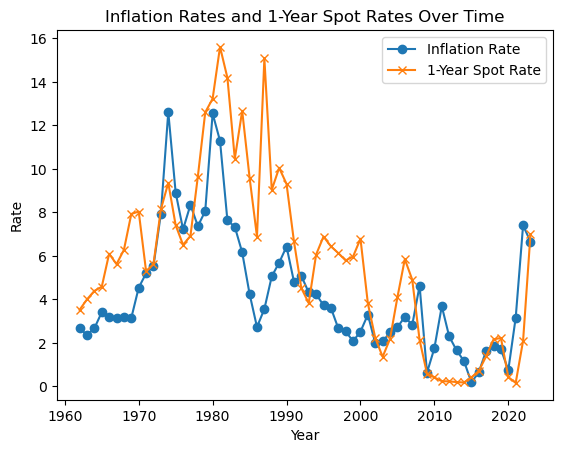

In [22]:
# Plot inflation rates
plt.plot(economic_data['Year'], economic_data['Inflation'], label='Inflation Rate', marker='o')

# Plot 1-year spot rates
plt.plot(economic_data['Year'], economic_data['1-yr Risk Free Annual Spot Rate'], label='1-Year Spot Rate', marker='x')

# Adding title and labels
plt.title('Inflation Rates and 1-Year Spot Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate')

# Adding a legend to distinguish between the two lines
plt.legend()

# Display the plot
plt.show()

In [23]:
model = ExponentialSmoothing(economic_data['1-yr Risk Free Annual Spot Rate'],
                             trend = 'add', seasonal_periods = 10,
                             seasonal = 'add')  
fit_model = model.fit()

# Forecast next 10 years (replace 10 with the number of years you want to forecast)
forecast = fit_model.forecast(steps=10)

# Display forecasted spot rates
print("Forecasted Spot Rates for the Next 10 Years:")
print(forecast)


Forecasted Spot Rates for the Next 10 Years:
62    7.338245
63    7.028283
64    6.946581
65    8.203197
66    7.371511
67    8.091477
68    7.898212
69    6.828259
70    6.345706
71    6.714307
dtype: float64


In [24]:
# Defining future spot rates
Spot1 = 0.0734
Spot2 = 0.0703
Spot3 = 0.0695
Spot4 = 0.0820
Spot5 = 0.0737

Average1 = Spot1
Average3 = pow(base = (1 + Spot1) * (1 + Spot2) * (1 + Spot3), exp = 1/3) - 1
Average5 = pow(base = (1 + Spot1) * (1 + Spot2) * (1 + Spot3) * (1 + Spot4) * (1 + Spot5), 
               exp = 1/5) - 1

In [26]:
year_now = 2024
total_reduction = 0.12822  # Combination of Heart Screening + Fitness Tracking
annual_screening_cost = 218

In [77]:
def discounted_future_benefits(forecast_term, policy, interest_rate, mort_table):
    # Set 'Policy.number' as the index temporarily for alignment purposes
    future_mort_index = mort_table.set_index('Policy.number').iloc[:, :forecast_term]

    # Create a Series for 'Face.Amount' aligned with 'mortality_table'
    future_face_amt = policy.set_index('Policy.number')['Face.amount']

    for column in future_mort_index.columns:
        future_mort_index[column] = future_mort_index[column] * future_face_amt
    
    discount_factors = np.array([(1 + interest_rate) ** (i + 1) for i in range(len(future_mort_index.columns))])
    future_mort_index /= discount_factors

    return future_mort_index

In [78]:
def intervention_future_benefits(forecast_term, policy, interest_rate, reduction, mort_table):
    # Set 'Policy.number' as the index temporarily for alignment purposes
    future_mort_index = mort_table.set_index('Policy.number').iloc[:, :forecast_term]

    # Create a Series for 'Face.Amount' aligned with 'mortality_table'
    future_face_amt = policy.set_index('Policy.number')['Face.amount']

    for column in future_mort_index.columns:
        future_mort_index[column] = future_mort_index[column] * future_face_amt * (1 - reduction)
    
    discount_factors = np.array([(1 + interest_rate) ** (i + 1) for i in range(len(future_mort_index.columns))])
    future_mort_index /= discount_factors

    return future_mort_index

In [133]:
inforce_data.columns

Index(['Policy.number', 'Policy.type', 'Issue.year', 'Issue.age', 'Sex',
       'Face.amount', 'Smoker.Status', 'Underwriting.Class', 'Urban.vs.Rural',
       'Region', 'Distribution.Channel', 'Death.indicator', 'Year.of.Death',
       'Lapse.Indicator', 'Year.of.Lapse', 'Cause.of.Death'],
      dtype='object')

In [152]:
wl_future = inforce_data[(inforce_data['Policy.type'] == 'SPWL') & 
                         (inforce_data['Death.indicator'] != 1.0)]
wl_future

,Policy.number,Policy.type,Issue.year,Issue.age,Sex,Face.amount,Smoker.Status,Underwriting.Class,Urban.vs.Rural,Region,Distribution.Channel,Death.indicator,Year.of.Death,Lapse.Indicator,Year.of.Lapse,Cause.of.Death
1,K0JK2XD81ZNI,SPWL,2001,54,M,1000000,NS,moderate risk,Rural,6,Agent,NaN,NaN,NaN,NaN,NaN
5,LKW7MA7BPAV1,SPWL,2001,41,M,2000000,NS,very low risk,Urban,6,Agent,NaN,NaN,NaN,NaN,NaN
6,MWUNTLGLE8NR,SPWL,2001,37,F,100000,NS,low risk,Urban,2,Agent,NaN,NaN,NaN,NaN,NaN
10,BJJ1U7SIJUCS,SPWL,2001,48,F,1000000,NS,moderate risk,Rural,2,Agent,NaN,NaN,NaN,NaN,NaN
16,CHBTT2PBPQYC,SPWL,2001,50,M,1000000,NS,high risk,Rural,2,Agent,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978570,0PTZ5D60VR6U,SPWL,2023,54,M,500000,NS,very low risk,Rural,6,Agent,NaN,NaN,NaN,NaN,NaN
978576,VDWF6688IKCV,SPWL,2023,55,F,500000,NS,very low risk,Urban,1,Agent,NaN,NaN,NaN,NaN,NaN
978577,20B62UZVBXMQ,SPWL,2023,52,M,250000,NS,very low risk,Urban,3,Agent,NaN,NaN,NaN,NaN,NaN
978578,XQ6FHVTCLZ0B,SPWL,2023,42,M,250000,NS,very low risk,Urban,2,Telemarketer,NaN,NaN,NaN,NaN,NaN


In [155]:
t20_future = inforce_data[(inforce_data['Policy.type'] == 'T20') & 
                         (inforce_data['Death.indicator'] != 1.0) &
                         (inforce_data['Lapse.Indicator'] != 1.0)]
t20_future

,Policy.number,Policy.type,Issue.year,Issue.age,Sex,Face.amount,Smoker.Status,Underwriting.Class,Urban.vs.Rural,Region,Distribution.Channel,Death.indicator,Year.of.Death,Lapse.Indicator,Year.of.Lapse,Cause.of.Death
89741,MTD4B0O9F15X,T20,2005,51,F,1000000,NS,very low risk,Urban,5,Agent,NaN,NaN,NaN,NaN,NaN
89742,4JQNNDDZCTW5,T20,2005,44,M,250000,NS,very low risk,Rural,3,Agent,NaN,NaN,NaN,NaN,NaN
89743,WWUMNI724MCH,T20,2005,43,F,100000,NS,very low risk,Rural,6,Telemarketer,NaN,NaN,NaN,NaN,NaN
89744,FWHXGHZ7D1HU,T20,2005,32,M,500000,NS,low risk,Rural,3,Agent,NaN,NaN,NaN,NaN,NaN
89746,X5CG52U39VUP,T20,2005,49,M,1000000,NS,very low risk,Rural,2,Telemarketer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978573,F54KGMRE4BVQ,T20,2023,41,M,500000,NS,low risk,Urban,3,Online,NaN,NaN,NaN,NaN,NaN
978574,8H6O1SEP1BWQ,T20,2023,33,M,100000,NS,very low risk,Urban,5,Online,NaN,NaN,NaN,NaN,NaN
978575,VWT6X9XUPIV0,T20,2023,28,F,250000,NS,high risk,Urban,1,Online,NaN,NaN,NaN,NaN,NaN
978579,Q75O3VLJ3PF7,T20,2023,47,F,2000000,NS,moderate risk,Rural,6,Agent,NaN,NaN,NaN,NaN,NaN


### **Whole Life Insurance**

In [161]:
def program_costs_wl(forecast_term, mort_table):
    future_mort_index = mort_table.set_index('Policy.number').iloc[:, :forecast_term]
    wl_cost = pd.DataFrame(annual_screening_cost, index=future_mort_index.index, 
                           columns=future_mort_index.columns, dtype=float)
    return wl_cost

In [156]:
# Generate a DataFrame for years
years_table = pd.DataFrame({'Year': np.arange(2025, 2030)})

# Cross join to create all combinations of policyholders and years
future_years = pd.merge(wl_future.assign(key=1), years_table.assign(key=1), on='key').drop('key', axis=1)

# Calculate age for each policyholder-year combination
future_years['Age'] = future_years['Year'] - future_years['Issue.year'] + future_years['Issue.age']

# ASSUMED NO NEW ENTRANTS & NO LAPSES

# Merge with mortality rates table to get the mortality rate for each age
future_years = pd.merge(future_years, mortality_rates, on='Age', how='left')

# Pivot to get the wide format table with policy numbers as rows and years as columns
future_mortality = future_years.pivot(index='Policy.number', columns='Year', values='Mortality Rate').fillna(0)

# After pivoting, to get 'Policy.number' as the first column
future_mortality = future_mortality.reset_index()

# To remove the name 'Year' from the columns if it appears after resetting the index
future_mortality.columns.name = None

In [157]:
future_mortality

,Policy.number,2025,2026,2027,2028,2029
0,00017VG4XXHV,0.005620,0.006170,0.006776,0.007501,0.008274
1,000CE919G9NH,0.001857,0.002014,0.002199,0.002411,0.002635
2,000LX4HLXDCR,0.035834,0.040465,0.045643,0.051406,0.057696
3,000MDH83FSBM,0.002014,0.002199,0.002411,0.002635,0.002881
4,000PWFJB7WUT,0.002411,0.002635,0.002881,0.003145,0.003449
...,...,...,...,...,...,...
351122,ZZZCKA0BA9L3,0.004613,0.005106,0.005620,0.006170,0.006776
351123,ZZZEAIT2L4NC,0.001709,0.001857,0.002014,0.002199,0.002411
351124,ZZZTCFJPOM0L,0.003449,0.003795,0.004178,0.004613,0.005106
351125,ZZZV9CNHCJWI,0.006170,0.006776,0.007501,0.008274,0.009044


#### **1-year Projection**

##### Before Intervention

In [158]:
# Discounted future benefits for a 1-year forecast
year1_forecast_np = discounted_future_benefits(1, wl_future, Average1, future_mortality)
print("Expected claims cost in 1 year: ", year1_forecast_np.sum().sum())

Expected claims cost in 1 year:  2821123269.2845173


##### After Intervention

In [159]:
year1_forecast_p = intervention_future_benefits(1, wl_future, Average1, total_reduction, future_mortality)
print("Expected claims cost in 1 year: ", year1_forecast_p.sum().sum())

Expected claims cost in 1 year:  2459398843.6968555


In [162]:
year1_cost = program_costs_wl(1, future_mortality)
print("Expected program cost in 1 year: ", year1_cost.sum().sum())

Expected program cost in 1 year:  76545686.0


In [163]:
year1_savings = year1_forecast_np.sum().sum() - year1_forecast_p.sum().sum() - year1_cost.sum().sum()
print("Expected economic benefit in 1 year: ", year1_savings)

Expected economic benefit in 1 year:  285178739.58766174


#### **3-year Projection**

##### Before Intervention

In [164]:
# Discounted future benefits for a 1-year forecast
year3_forecast_np = discounted_future_benefits(3, wl_future, Average3, future_mortality)
print("Expected claims cost in 3 years: ", year3_forecast_np.sum().sum())

Expected claims cost in 3 years:  8777384240.863958


##### After Intervention

In [165]:
year3_forecast_p = intervention_future_benefits(3, wl_future, Average3, total_reduction, future_mortality)
print("Expected claims cost in 3 years: ", year3_forecast_p.sum().sum())

Expected claims cost in 3 years:  7651948033.500381


In [166]:
year3_cost = program_costs_wl(3, future_mortality)
print("Expected program cost in 3 years: ", year3_cost.sum().sum())

Expected program cost in 3 years:  229637058.0


In [167]:
year3_savings = year3_forecast_np.sum().sum() - year3_forecast_p.sum().sum() - year3_cost.sum().sum()
print("Expected economic benefit in 3 years: ", year3_savings)

Expected economic benefit in 3 years:  895799149.3635769


#### **5-year Projection**

##### Before Intervention

In [168]:
# Discounted future benefits for a 1-year forecast
year5_forecast_np = discounted_future_benefits(5, wl_future, Average5, future_mortality)
print("Expected claims cost in 5 years: ", year5_forecast_np.sum().sum())

Expected claims cost in 5 years:  15042622598.914013


##### After Intervention

In [169]:
year5_forecast_p = intervention_future_benefits(5, wl_future, Average5, total_reduction, future_mortality)
print("Expected claims cost in 5 years: ", year5_forecast_p.sum().sum())

Expected claims cost in 5 years:  13113857529.281258


In [170]:
year5_cost = program_costs_wl(5, future_mortality)
print("Expected program cost in 5 years: ", year5_cost.sum().sum())

Expected program cost in 5 years:  382728430.0


In [171]:
year5_savings = year5_forecast_np.sum().sum() - year5_forecast_p.sum().sum() - year5_cost.sum().sum()
print("Expected economic benefit in 5 years: ", year5_savings)

Expected economic benefit in 5 years:  1546036639.6327553


#### **Whole Life Insurance Projections**

| Timeframe | Claims Cost - Before Program | Claims Cost - After Program    | Program Cost    | Net Savings       | Savings Per Year  |
| --------- | ---------------------------- | ------------------------------ | --------------- | ----------------- | ----------------- |
| 1         | 2,821,123,269.28             | 2,459,398,843.70               | 76,545,686.00   | 285,178,739.59    | 285,178,739.59    |
| 3         | 8,777,384,240.86             | 7,651,948,033.50               | 229,637,058.00  | 895,799,149.36    | 298,599,716.50    |
| 5         | 15,042,622,598.91            | 13,113,857,529.28              | 382,728,430.00  | 1,546,036,639.63  | 309,207,327.90    |

### **20-Year Term Assurance**

In [172]:
def program_costs_t20(forecast_term, mort_table):
    future_mort_index = mort_table.set_index('Policy.number').iloc[:, :forecast_term]
    t20_cost = pd.DataFrame(annual_screening_cost, index=future_mort_index.index, 
                           columns=future_mort_index.columns, dtype=float)

    t20_cost[future_mort_index == 0] = 0
    
    return t20_cost

In [173]:
# Generate a DataFrame for years
t20_table = pd.DataFrame({'Year': np.arange(2025, 2030)})

# Cross join to create all combinations of policyholders and years
t20_years = pd.merge(t20_future.assign(key=1), t20_table.assign(key=1), on='key').drop('key', axis=1)

# Calculate age for each policyholder-year combination
t20_years['Age'] = t20_years['Year'] - t20_years['Issue.year'] + t20_years['Issue.age']

t20_years = t20_years.loc[t20_years['Year'] < t20_years['Issue.year'] + 20]

# ASSUMED NO NEW ENTRANTS & NO LAPSES BEFORE TERM END

# Merge with mortality rates table to get the mortality rate for each age
t20_years = pd.merge(t20_years, mortality_rates, on='Age', how='left')

# Pivot to get the wide format table with policy numbers as rows and years as columns
t20_mortality = t20_years.pivot(index='Policy.number', columns='Year', values='Mortality Rate').fillna(0)

# After pivoting, to get 'Policy.number' as the first column
t20_mortality = t20_mortality.reset_index()

# To remove the name 'Year' from the columns if it appears after resetting the index
t20_mortality.columns.name = None

In [174]:
t20_mortality

,Policy.number,2025,2026,2027,2028,2029
0,0002UJPUUTWR,0.001337,0.001447,0.001573,0.001709,0.001857
1,0003VKGC95EY,0.006776,0.007501,0.008274,0.009044,0.009891
2,000AWCZ28YPL,0.005620,0.006170,0.006776,0.007501,0.008274
3,000CCKZZSSEB,0.001337,0.001447,0.001573,0.001709,0.001857
4,000CXYU1RI4W,0.004178,0.004613,0.005106,0.005620,0.006170
...,...,...,...,...,...,...
471064,ZZZC4B3SZV97,0.003795,0.004178,0.004613,0.005106,0.005620
471065,ZZZHWOOXPHWP,0.004613,0.005106,0.005620,0.006170,0.006776
471066,ZZZK3PSTJK2K,0.003449,0.003795,0.004178,0.004613,0.005106
471067,ZZZR34Z2YROF,0.003145,0.003449,0.003795,0.004178,0.004613


#### **1-year Projection**

##### Before Intervention

In [175]:
# Discounted future benefits for a 1-year forecast
year1_forecast_np_t20 = discounted_future_benefits(1, t20_future, Average1, t20_mortality)
print("Expected claims cost in 1 year: ", year1_forecast_np_t20.sum().sum())

Expected claims cost in 1 year:  1232998425.4238865


##### After Intervention

In [176]:
year1_forecast_p_t20 = intervention_future_benefits(1, t20_future, Average1, total_reduction, t20_mortality)
print("Expected claims cost in 1 year: ", year1_forecast_p_t20.sum().sum())

Expected claims cost in 1 year:  1074903367.316036


In [177]:
year1_cost_t20 = program_costs_t20(1, t20_mortality)
print("Expected program cost in 1 year: ", year1_cost_t20.sum().sum())

Expected program cost in 1 year:  102693042.0


In [178]:
year1_savings_t20 = year1_forecast_np_t20.sum().sum() - year1_forecast_p_t20.sum().sum() - year1_cost_t20.sum().sum()
print("Expected economic benefit in 1 year: ", year1_savings_t20)

Expected economic benefit in 1 year:  55402016.10785055


#### **3-year Projection**

##### Before Intervention

In [179]:
# Discounted future benefits for a 1-year forecast
year3_forecast_np_t20 = discounted_future_benefits(3, t20_future, Average3, t20_mortality)
print("Expected claims cost in 3 years: ", year3_forecast_np_t20.sum().sum())

Expected claims cost in 3 years:  3479847962.2071295


##### After Intervention

In [180]:
year3_forecast_p_t20 = intervention_future_benefits(3, t20_future, Average3, total_reduction, t20_mortality)
print("Expected claims cost in 3 years: ", year3_forecast_p_t20.sum().sum())

Expected claims cost in 3 years:  3033661856.492932


In [181]:
year3_cost_t20 = program_costs_t20(3, t20_mortality)
print("Expected program cost in 3 years: ", year3_cost_t20.sum().sum())

Expected program cost in 3 years:  295721360.0


In [182]:
year3_savings_t20 = year3_forecast_np_t20.sum().sum() - year3_forecast_p_t20.sum().sum() - year3_cost_t20.sum().sum()
print("Expected economic benefit in 3 years: ", year3_savings_t20)

Expected economic benefit in 3 years:  150464745.71419764


#### **5-year Projection**

##### Before Intervention

In [183]:
# Discounted future benefits for a 1-year forecast
year5_forecast_np_t20 = discounted_future_benefits(5, t20_future, Average5, t20_mortality)
print("Expected claims cost in 5 years: ", year5_forecast_np_t20.sum().sum())

Expected claims cost in 5 years:  5350847975.34759


##### After Intervention

In [184]:
year5_forecast_p_t20 = intervention_future_benefits(5, t20_future, Average5, total_reduction, t20_mortality)
print("Expected claims cost in 5 years: ", year5_forecast_p_t20.sum().sum())

Expected claims cost in 5 years:  4664762247.948523


In [185]:
year5_cost_t20 = program_costs_t20(5, t20_mortality)
print("Expected program cost in 5 years: ", year5_cost_t20.sum().sum())

Expected program cost in 5 years:  469100902.0


In [186]:
year5_savings_t20 = year5_forecast_np_t20.sum().sum() - year5_forecast_p_t20.sum().sum() - year5_cost_t20.sum().sum()
print("Expected economic benefit in 5 years: ", year5_savings_t20)

Expected economic benefit in 5 years:  216984825.39906788


#### **20-Year Term Assurance Projections**

| Timeframe | Claims Cost - Before Program | Claims Cost - After Program    | Program Cost     | Net Savings       | Savings Per Year   |
| --------- | ---------------------------- | ------------------------------ | ---------------- | ----------------- | ------------------ | 
| 1         | 1,232,998,425.42             | 1,074,903,367.32               | 102,693,042.00   | 55,402,016.10     | 55,402,016.10      |
| 3         | 3,479,847,962.21             | 3,033,661,856.49               | 295,721,360.00   | 150,464,745.71    | 50,154,915.24      |
| 5         | 5,350,847,975.35             | 4,664,762,247.95               | 469,100,902.00   | 216,984,825.40    | 43,396,965.08      |